In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from pandas import to_datetime
from prophet import Prophet
import fbprophet

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# **Importing the data set:-**

In [41]:
dset = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Capstone Project\DailyDelhiClimate.csv')
dset

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [2]:
dset = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Capstone Project\DailyDelhiClimate.csv')
dset = dset[['date', 'meanpressure']].copy().dropna()
dset

,date,meanpressure
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000
...,...,...
1457,2016-12-28,1015.565217
1458,2016-12-29,1016.904762
1459,2016-12-30,1017.904762
1460,2016-12-31,1016.100000


In [3]:
dset.columns=["ds","y"]

In [4]:
dset = dset.replace(',','', regex=True)

# **Converting dataset to numeric :-**

In [5]:
pd.to_numeric(dset['y'])

0       1015.666667
1       1017.800000
2       1018.666667
3       1017.166667
4       1016.500000
           ...     
1457    1015.565217
1458    1016.904762
1459    1017.904762
1460    1016.100000
1461    1016.000000
Name: y, Length: 1462, dtype: float64

In [6]:
dset['ds']= to_datetime(dset['ds'])

In [7]:
dset.head()

,ds,y
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000


In [8]:
from fbprophet import Prophet
model = Prophet()

# **Fitting the model in dataset:-**

In [9]:
model.fit(dset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
model

In [11]:
future = model.make_future_dataframe(periods =365)

# **Prediction of the Model:-**

In [12]:
pred=model.predict(future)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1005.027650,789.710925,1238.795067,1005.027650,1005.027650,-1.891881,-1.891881,-1.891881,-10.902243,-10.902243,-10.902243,9.010362,9.010362,9.010362,0.0,0.0,0.0,1003.135769
1,2013-01-02,1005.032736,789.603848,1241.391016,1005.032736,1005.032736,6.682469,6.682469,6.682469,-2.870940,-2.870940,-2.870940,9.553409,9.553409,9.553409,0.0,0.0,0.0,1011.715205
2,2013-01-03,1005.037822,790.399685,1225.601218,1005.037822,1005.037822,8.521364,8.521364,8.521364,-1.555378,-1.555378,-1.555378,10.076742,10.076742,10.076742,0.0,0.0,0.0,1013.559186
3,2013-01-04,1005.042908,788.536321,1232.753974,1005.042908,1005.042908,7.508381,7.508381,7.508381,-3.051588,-3.051588,-3.051588,10.559969,10.559969,10.559969,0.0,0.0,0.0,1012.551289
4,2013-01-05,1005.047994,782.075163,1249.852092,1005.047994,1005.047994,9.587361,9.587361,9.587361,-1.395155,-1.395155,-1.395155,10.982516,10.982516,10.982516,0.0,0.0,0.0,1014.635355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2017-12-28,965.199818,735.849964,1200.569609,957.576417,972.451056,5.341266,5.341266,5.341266,-1.555378,-1.555378,-1.555378,6.896644,6.896644,6.896644,0.0,0.0,0.0,970.541084
1823,2017-12-29,965.105047,757.792602,1199.091674,957.451209,972.396082,4.279865,4.279865,4.279865,-3.051588,-3.051588,-3.051588,7.331454,7.331454,7.331454,0.0,0.0,0.0,969.384912
1824,2017-12-30,965.010276,733.034879,1191.758162,957.326002,972.334629,6.419083,6.419083,6.419083,-1.395155,-1.395155,-1.395155,7.814237,7.814237,7.814237,0.0,0.0,0.0,971.429359
1825,2017-12-31,964.915506,742.487567,1187.063886,957.200794,972.284882,3.568639,3.568639,3.568639,-4.764629,-4.764629,-4.764629,8.333269,8.333269,8.333269,0.0,0.0,0.0,968.484145


# **Preparing Data for Training:-**

In [13]:
# Determining time series
dset['ds'] = pd.to_datetime(dset['ds'], dayfirst=True)
# dset.columns = ['y', 'ds']

dset['month'], dset['year'] = dset['ds'].dt.month, dset['ds'].dt.year
dset.head()

data = dset[['ds', 'y']].copy().dropna()
data.columns = ['ds', 'y']
# data = data[(data.y != 0).any()]

daily_dset = data.groupby(pd.PeriodIndex(data['ds'], freq='D'))['y'].mean().to_timestamp().reset_index()
daily_dset
# daily_dset.dtypes





,ds,y
0,2013-01-01,1015.666667
1,2013-01-02,1017.800000
2,2013-01-03,1018.666667
3,2013-01-04,1017.166667
4,2013-01-05,1016.500000
...,...,...
1457,2016-12-28,1015.565217
1458,2016-12-29,1016.904762
1459,2016-12-30,1017.904762
1460,2016-12-31,1016.100000


In [14]:
monthly_dset = data.groupby(pd.PeriodIndex(data['ds'], freq='M'))['y'].mean().to_timestamp().reset_index()
monthly_dset

,ds,y
0,2013-01-01,1017.847734
1,2013-02-01,1015.946003
2,2013-03-01,1011.733909
3,2013-04-01,1006.292341
4,2013-05-01,999.924194
5,2013-06-01,997.408849
6,2013-07-01,997.380300
7,2013-08-01,1000.439977
8,2013-09-01,1003.949167
9,2013-10-01,1009.848848


In [15]:
annual_dset = data.groupby(pd.PeriodIndex(data['ds'], freq='Y'))['y'].mean().to_timestamp().reset_index()
annual_dset.head()
# annual_dset.dtypes

,ds,y
0,2013-01-01,1007.642172
1,2014-01-01,1008.347166
2,2015-01-01,1008.834821
3,2016-01-01,1019.557460
4,2017-01-01,1016.000000


# **Training the models and evaluating forecasts:-**

In [16]:
def train_model(growth, seasonality, dset):
    model = None

    if seasonality == 'daily':
        model = Prophet(growth=growth, changepoint_prior_scale=30, n_changepoints=30, daily_seasonality=False)
        model.add_seasonality('daily', period=1, fourier_order=15)
        model.fit(dset)

    elif seasonality == 'monthly':
        model = Prophet(growth=growth, changepoint_prior_scale=15, n_changepoints=3, weekly_seasonality=False)
        model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        model.fit(dset)

    elif seasonality == 'annual':
        model = Prophet(growth=growth, changepoint_prior_scale=15, n_changepoints=3, yearly_seasonality=False)
        model.add_seasonality(name='yearly', period=365, fourier_order=15)
        model.fit(dset)      

    return model



# **Forecasting:-**

In [17]:
def get_forecast(model, time_period):
    future_df = model.make_future_dataframe(periods=time_period)
    forecast = model.predict(future_df)
    return future_df, forecast


def evaluate_forecast(forecast, actual, time_period):
    y_true = actual
    y_pred = forecast[:(len(forecast)-time_period)]

    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    reg_score = r2_score(y_true, y_pred)    

    print("Regression Score :", reg_score)
    print("Mean Absolute Error :", mae)
    print("Mean Absolute Percentage Error :", mape)

    plt.plot(y_pred, c='orange', label='Predicted')
    plt.plot(y_true, c='blue', label='Actual')
    plt.legend(loc='lower right')
    plt.show()



def plot_graph(data, label):
    plt.plot(data, c='green', label=label)
    plt.legend(loc='lower right')
    plt.show()

# **Daily Consumption Forecast:-** 

In [18]:
dset_daily = pd.DataFrame(daily_dset)
dset_daily.dtypes
model_daily = train_model(growth='linear', seasonality='daily', dset=dset_daily)
future_daily, forecast_daily = get_forecast(model=model_daily, time_period=365)

forecast_daily

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1005.951140,807.556579,1249.265243,1005.951140,1005.951140,14.097008,14.097008,14.097008,-13.852168,...,-10.944015,-10.944015,-10.944015,38.893191,38.893191,38.893191,0.0,0.0,0.0,1020.048148
1,2013-01-02,1005.672335,786.370397,1258.849768,1005.672335,1005.672335,22.297294,22.297294,22.297294,-13.852168,...,-2.889789,-2.889789,-2.889789,39.039251,39.039251,39.039251,0.0,0.0,0.0,1027.969629
2,2013-01-03,1005.393531,798.657366,1269.242830,1005.393531,1005.393531,23.747909,23.747909,23.747909,-13.852168,...,-1.565099,-1.565099,-1.565099,39.165176,39.165176,39.165176,0.0,0.0,0.0,1029.141439
3,2013-01-04,1005.114727,804.904350,1250.766304,1005.114727,1005.114727,22.351043,22.351043,22.351043,-13.852168,...,-3.052428,-3.052428,-3.052428,39.255639,39.255639,39.255639,0.0,0.0,0.0,1027.465770
4,2013-01-05,1004.835922,802.821101,1259.785736,1004.835922,1004.835922,24.068592,24.068592,24.068592,-13.852168,...,-1.374231,-1.374231,-1.374231,39.294991,39.294991,39.294991,0.0,0.0,0.0,1028.904514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2017-12-28,827.780923,-35.964882,1611.164350,-43.937994,1558.807222,22.928057,22.928057,22.928057,-13.852168,...,-1.565099,-1.565099,-1.565099,38.345325,38.345325,38.345325,0.0,0.0,0.0,850.708980
1823,2017-12-29,827.369473,-30.703786,1597.692233,-47.140126,1563.364190,21.535889,21.535889,21.535889,-13.852168,...,-3.052428,-3.052428,-3.052428,38.440485,38.440485,38.440485,0.0,0.0,0.0,848.905362
1824,2017-12-30,826.958023,-27.548824,1656.364501,-50.107199,1567.921158,23.336024,23.336024,23.336024,-13.852168,...,-1.374231,-1.374231,-1.374231,38.562423,38.562423,38.562423,0.0,0.0,0.0,850.294047
1825,2017-12-31,826.546573,-18.692255,1608.090775,-53.074272,1572.478126,20.128293,20.128293,20.128293,-13.852168,...,-4.723509,-4.723509,-4.723509,38.703971,38.703971,38.703971,0.0,0.0,0.0,846.674866


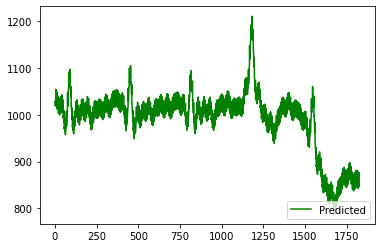

In [19]:
plot_graph(forecast_daily['yhat'], 'Predicted')

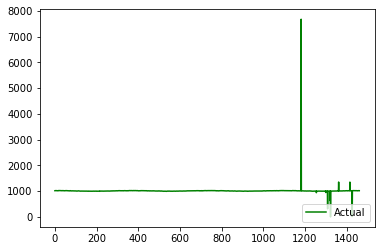

In [20]:
plot_graph(dset_daily['y'], 'Actual')

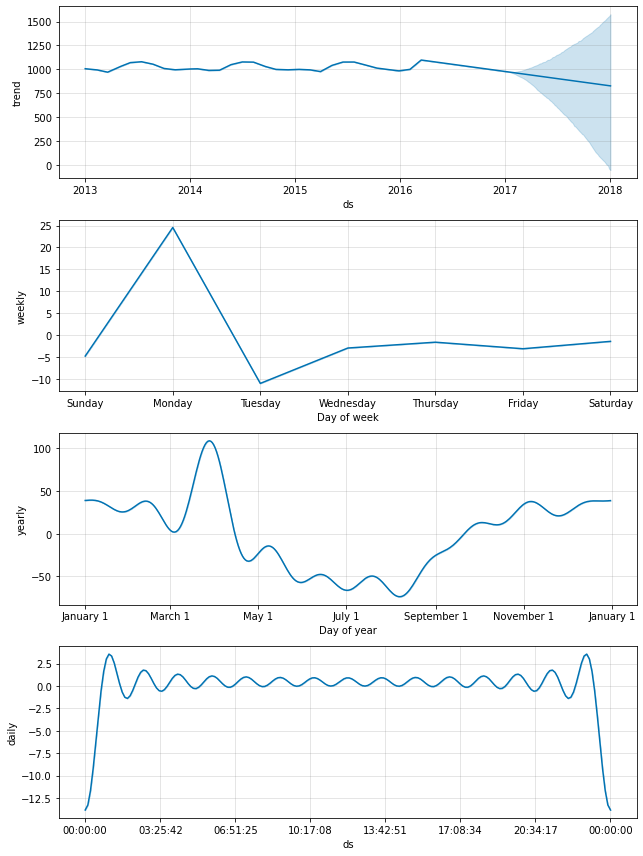

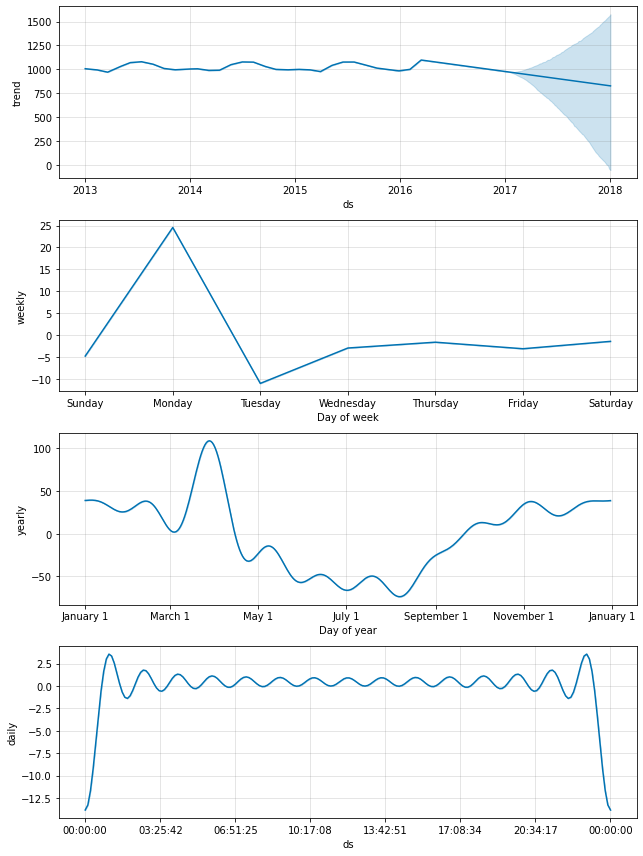

In [21]:
model_daily.plot_components(forecast_daily)

In [22]:
from distributed import Client
from fbprophet.diagnostics import cross_validation

client = Client()
client

Client Scheduler: tcp://127.0.0.1:57746 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 7.90 GiB


In [23]:
dset = cross_validation(model_daily, 
                         horizon="365 days",
                         period="182.5 days", 
                         initial="730 days", 
                         parallel=None
                        )

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-01-02 00:00:00 and 2016-01-02 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [24]:
from fbprophet.diagnostics import performance_metrics

performance_metrics(dset, rolling_window=1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,365 days,84146.170862,290.079594,27.186517,0.395508,0.004862,0.909589


# **Monthly Forecasting:-**

In [25]:
model_monthly = train_model(growth='linear', seasonality='monthly', dset=monthly_dset)
future_monthly, forecast_monthly = get_forecast(model=model_monthly, time_period=1)

forecast_monthly

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,1755.438227,1004.588111,1046.127290,1755.438227,1755.438227,-728.914503,-728.914503,-728.914503,-684.617753,-684.617753,-684.617753,-44.296750,-44.296750,-44.296750,0.0,0.0,0.0,1026.523724
1,2013-02-01,1760.568177,994.747566,1036.999273,1760.568177,1760.568177,-746.770542,-746.770542,-746.770542,-608.716113,-608.716113,-608.716113,-138.054429,-138.054429,-138.054429,0.0,0.0,0.0,1013.797635
2,2013-03-01,1765.201680,1038.529720,1082.496581,1765.201680,1765.201680,-704.917880,-704.917880,-704.917880,-787.925416,-787.925416,-787.925416,83.007536,83.007536,83.007536,0.0,0.0,0.0,1060.283800
3,2013-04-01,1770.331629,966.430288,1007.641643,1770.331629,1770.331629,-784.590555,-784.590555,-784.590555,-766.690345,-766.690345,-766.690345,-17.900209,-17.900209,-17.900209,0.0,0.0,0.0,985.741075
4,2013-05-01,1775.296097,952.710131,994.843190,1775.296097,1775.296097,-800.940323,-800.940323,-800.940323,-787.925416,-787.925416,-787.925416,-13.014907,-13.014907,-13.014907,0.0,0.0,0.0,974.355774
5,2013-06-01,1780.426046,967.426973,1007.842555,1780.426046,1780.426046,-791.584646,-791.584646,-791.584646,-766.690345,-766.690345,-766.690345,-24.894301,-24.894301,-24.894301,0.0,0.0,0.0,988.841400
6,2013-07-01,1785.390514,960.715656,1001.038465,1785.390514,1785.390514,-803.718726,-803.718726,-803.718726,-787.925416,-787.925416,-787.925416,-15.793309,-15.793309,-15.793309,0.0,0.0,0.0,981.671788
7,2013-08-01,1790.520463,954.310299,995.845436,1790.520463,1790.520463,-815.072662,-815.072662,-815.072662,-766.690345,-766.690345,-766.690345,-48.382317,-48.382317,-48.382317,0.0,0.0,0.0,975.447801
8,2013-09-01,1795.650413,996.163283,1039.313205,1795.650413,1795.650413,-778.082505,-778.082505,-778.082505,-743.962414,-743.962414,-743.962414,-34.120091,-34.120091,-34.120091,0.0,0.0,0.0,1017.567907
9,2013-10-01,1800.614880,996.757563,1038.259394,1800.614880,1800.614880,-782.975759,-782.975759,-782.975759,-766.690345,-766.690345,-766.690345,-16.285413,-16.285413,-16.285413,0.0,0.0,0.0,1017.639121


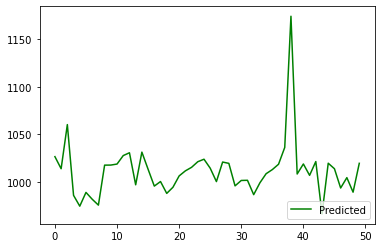

In [26]:
plot_graph(forecast_monthly['yhat'], 'Predicted')

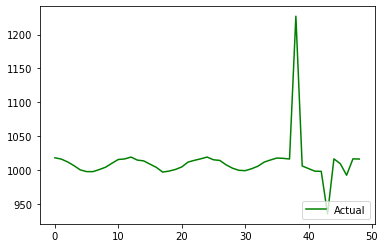

In [27]:
plot_graph( monthly_dset['y'], 'Actual')

Regression Score : 0.763309327507259
Mean Absolute Error : 11.897904531813758
Mean Absolute Percentage Error : 0.01166397433107374


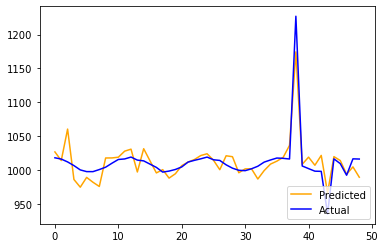

In [28]:
evaluate_forecast(forecast_monthly['yhat'], monthly_dset['y'], 1)

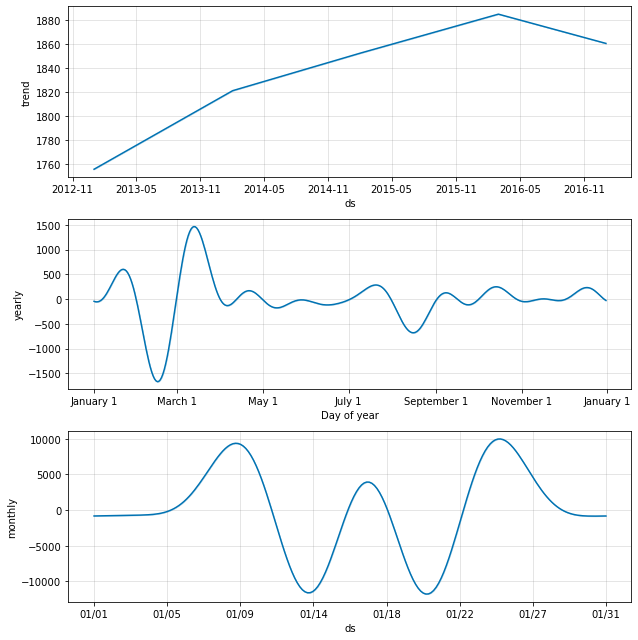

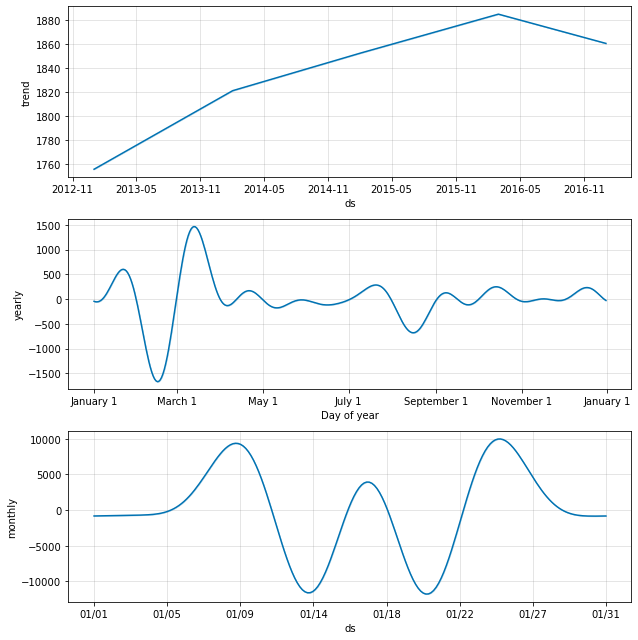

In [29]:
model_monthly.plot_components(forecast_monthly)

In [30]:
from distributed import Client
from fbprophet.diagnostics import cross_validation

client = Client()
client

Client Scheduler: tcp://127.0.0.1:57796 Dashboard: http://127.0.0.1:57795/status,Cluster Workers: 4 Cores: 4 Memory: 7.90 GiB


In [31]:
dset = cross_validation(model_monthly, 
                         horizon="365 days",
                         period="182.5 days", 
                         initial="730 days", 
                         parallel=None
                        )

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-01-02 00:00:00 and 2016-01-02 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [32]:
from fbprophet.diagnostics import performance_metrics

performance_metrics(dset, rolling_window=1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,365 days,235209.612405,484.984136,345.174934,0.338813,0.107067,0.166667


# **Annual Forecasting:-**

In [33]:
model_annual= train_model(growth='linear', seasonality='annual', dset=annual_dset)
future_annual, forecast_annual = get_forecast(model=model_annual, time_period=10)

forecast_annual

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,266.076118,1007.642172,1007.642172,266.076118,266.076118,741.566055,741.566055,741.566055,741.566055,741.566055,741.566055,0.0,0.0,0.0,1007.642172
1,2014-01-01,266.781111,1008.347166,1008.347166,266.781111,266.781111,741.566055,741.566055,741.566055,741.566055,741.566055,741.566055,0.0,0.0,0.0,1008.347166
2,2015-01-01,267.268767,1008.834821,1008.834821,267.268767,267.268767,741.566055,741.566055,741.566055,741.566055,741.566055,741.566055,0.0,0.0,0.0,1008.834821
3,2016-01-01,277.991405,1019.557460,1019.557460,277.991405,277.991405,741.566055,741.566055,741.566055,741.566055,741.566055,741.566055,0.0,0.0,0.0,1019.557460
4,2017-01-01,297.390740,1016.000000,1016.000000,297.390740,297.390740,718.609260,718.609260,718.609260,718.609260,718.609260,718.609260,0.0,0.0,0.0,1016.000000
5,2017-01-02,297.443744,968.047590,968.047590,297.443744,297.443744,670.603846,670.603846,670.603846,670.603846,670.603846,670.603846,0.0,0.0,0.0,968.047590
6,2017-01-03,297.496747,884.067640,884.067640,297.496747,297.496747,586.570892,586.570892,586.570892,586.570892,586.570892,586.570892,0.0,0.0,0.0,884.067640
7,2017-01-04,297.549751,752.387528,752.387528,297.549751,297.549751,454.837776,454.837776,454.837776,454.837776,454.837776,454.837776,0.0,0.0,0.0,752.387528
8,2017-01-05,297.602755,561.885969,561.885969,297.602755,297.602755,264.283214,264.283214,264.283214,264.283214,264.283214,264.283214,0.0,0.0,0.0,561.885969
9,2017-01-06,297.655758,303.309865,303.309865,297.655758,297.655758,5.654107,5.654107,5.654107,5.654107,5.654107,5.654107,0.0,0.0,0.0,303.309865


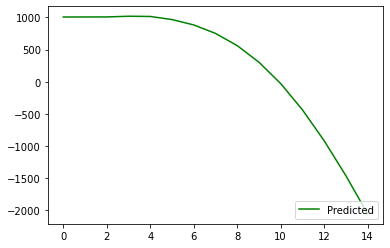

In [34]:
plot_graph(forecast_annual['yhat'], 'Predicted')

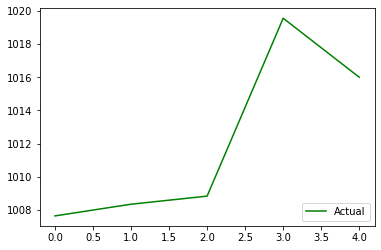

In [35]:
plot_graph(annual_dset['y'], 'Actual')

Regression Score : 1.0
Mean Absolute Error : 1.0868461686186492e-10
Mean Absolute Percentage Error : 1.0724105711620151e-13


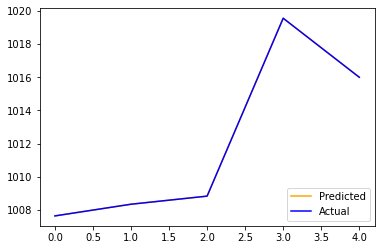

In [36]:
evaluate_forecast(forecast_annual['yhat'], annual_dset['y'], 10)

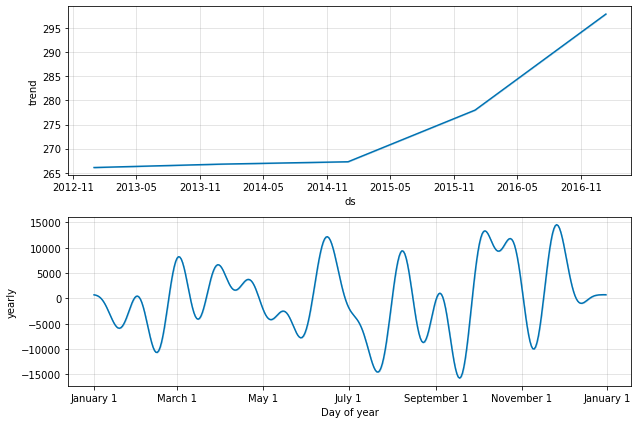

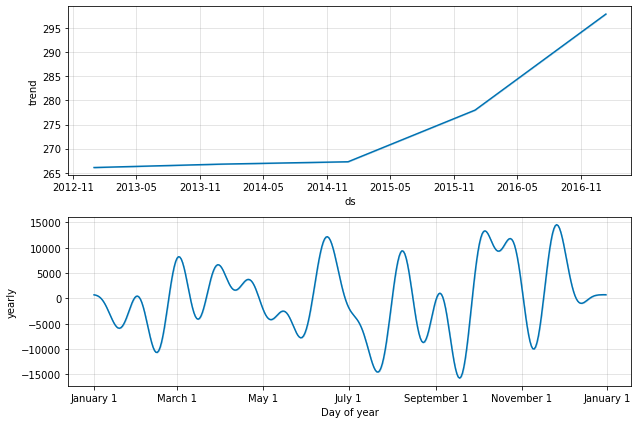

In [37]:
model_annual.plot_components(forecast_annual)

In [38]:
from distributed import Client
from fbprophet.diagnostics import cross_validation

client = Client()
client

Client Scheduler: tcp://127.0.0.1:57880 Dashboard: http://127.0.0.1:57879/status,Cluster Workers: 4 Cores: 4 Memory: 7.90 GiB


In [39]:
dset = cross_validation(model_annual, 
                         horizon="365 days",
                         period="182.5 days", 
                         initial="730 days", 
                         parallel=None
                        )

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-01-02 00:00:00 and 2016-01-02 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.


In [40]:
from fbprophet.diagnostics import performance_metrics

performance_metrics(dset, rolling_window=1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,365 days,11926.879995,109.210256,69.691023,0.06857,0.010039,0.0
